# Analyse des bandes électroniques du matériau mp-31454 (TaRbSu)

<br />

----

## Mise en place du code

In [22]:
# Téléchargement des bandes éléctroniqes du matériau attribué

from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter

k = "zkUgCxiKVvQri3sF2Sx"  # Clé de l'API

with MPRester(k) as m:
    bandStruct = m.get_bandstructure_by_material_id("mp-31454")  # Récupération de la structure assignée

In [140]:
# Import(s) nécessaire(s) pour la suite du notebook

import pymatgen.electronic_structure.plotter as ebplt
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.electronic_structure.core import Spin
import sympy as sp

In [130]:
# Dictionnaire des symboles
dsym = {"$\\Gamma$":"Γ","K$\mid$U":"K|U"}

def resolveSym(sym) :
    return sym if sym not in dsym else dsym[sym]

---

## Affichage initial de la structure de bandes

<br />

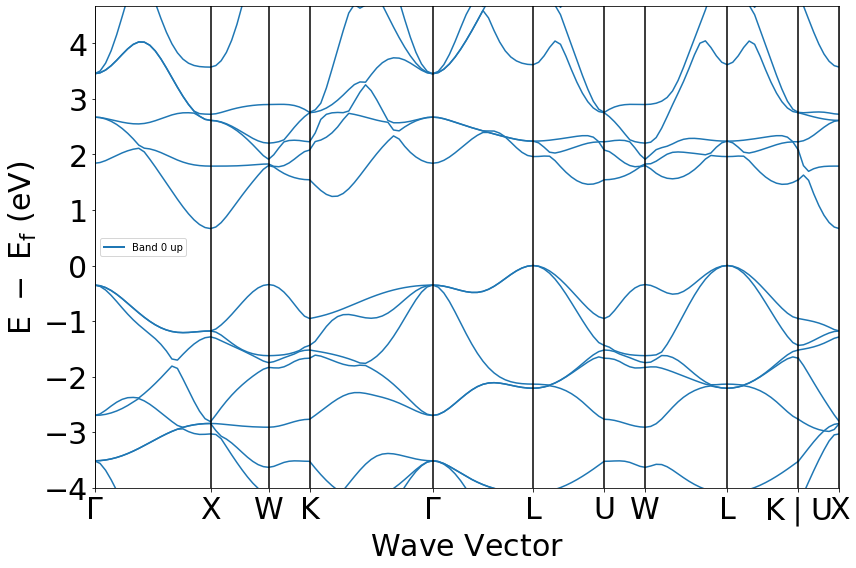

In [24]:
plotBand = ebplt.BSPlotter(bandStruct)
plotBand.show()

---

## Détermination de la bande interdite

<br />

In [129]:
print(75*"=")
print("Informations sur la bande interdite :")
print("{0}".format(bandStruct.get_band_gap()))
print(75*"=")

Informations sur la bande interdite :
{'direct': False, 'energy': 0.665, 'transition': 'L-X'}


Les informations acquises à propos de la bande interdite nous indique que celle-ci est une bande indirecte d'une différence d'énergie valant 0.665 eV. La maximum de la bande de valence se trouve en L alors que le minimum de la bande de conduction se trouve en X, illustrant ainsi le paramètre "transition" dans les informations obtenues ci-dessus.

---

## Directions de dispersion

Afin de calculer les directions entrainant respectivement les plus grandes et plus basses dispersions, nous devons tout d'abord obtenir les informations sur différents vecteurs d'onde k possibles et les énergies relatives aux points considérés afin de pouvoir observer quelle situation mène à la différence recherchée. Une direction ayant la plus grande valeur de dispersion sera celle pour laquelle le ratio entre la différence des énergies observées à chaque extrémité de ce vecteur de direction et la taille de ce vecteur sera le plus grand.

In [131]:
plotBand = ebplt.BSPlotter(bandStruct)
data = plotBand.bs_plot_data()   # Obtention des informations du graphe
energies = data['energy']["1"]   # Récupération des valeurs des énergies pour chaque bande
ticks = data['ticks']            # Chaque point de la zone de Brillouin considéré

labels = [resolveSym(ticks["label"][i]) for i in [0,1,3,5,7,9,11,13,15,17,18]]
ticDis = ticks['distance']

dists = np.array(list(dict.fromkeys(ticDis)))  # Liste cumulative de la distance parcourue selon l'axe x

dTtT = dists[1:]-dists[:-1]  # Distances respectives entre chaque point considéré

---

### Dernière bande de valence

Pour la dernière bande de valence :
 - direction avec la plus grande dispersion = U -> W avec une valeur de 1.70490
 - direction avec la plus petite dispersion = Γ -> L avec une valeur de 0.40100


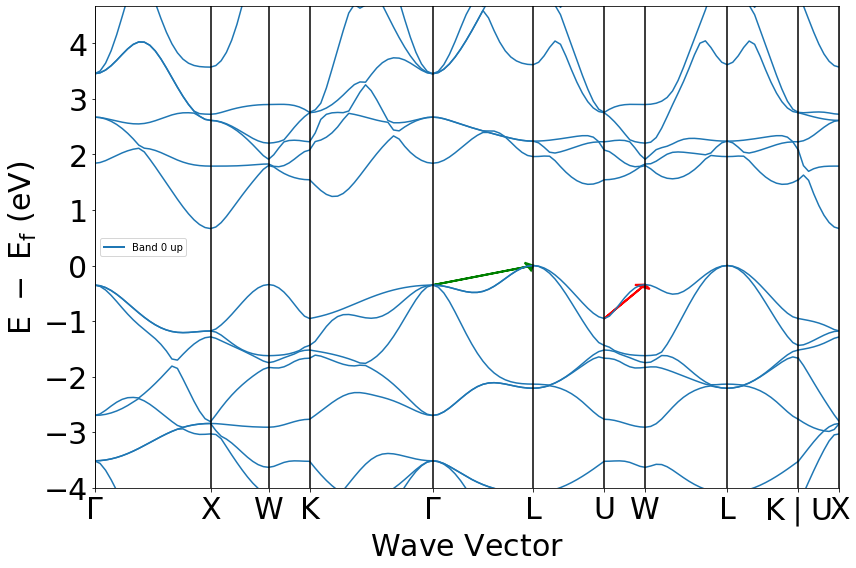

In [137]:
# Préparation du graphe
plsb = plotBand.get_plot()

# Indice de la dernière bande
vbm = bandStruct.get_vbm()
inV = vbm["band_index"][Spin.up][-1]

# Valeur de la dernière bande de valence
lastBandVal = np.zeros(len(dTtT))
for i in range(len(dTtT)) :
    lastBandVal[i] = abs((energies[i][inV][-1]-energies[i][inV][0])/dTtT[i])

# Dispersion maximale
inMV = np.argmax(lastBandVal)

# Dispersion minimale
inmV = np.argmin(lastBandVal)

print(100*"=")
print("Pour la dernière bande de valence :")
print(" - direction avec la plus grande dispersion = {0} -> {1} avec une valeur de {2:.5f}".format(labels[inMV],labels[inMV+1],lastBandVal[inMV]))
print(" - direction avec la plus petite dispersion = {0} -> {1} avec une valeur de {2:.5f}".format(labels[inmV],labels[inmV+1],lastBandVal[inmV]))
print(100*"=")

# Direction de la dispersion maximale
plt.arrow(dists[inMV],energies[inMV][inV][0],dTtT[inMV],energies[inMV][inV][-1]-energies[inMV][inV][0],
          head_width=0.15, head_length=0.05, linewidth=2, color='r', length_includes_head=True)

# Direction de la dispersion minimale
plt.arrow(dists[inmV],energies[inmV][inV][0],dTtT[inmV],energies[inmV][inV][-1]-energies[inmV][inV][0],
          head_width=0.15, head_length=0.05, linewidth=2, color='g', length_includes_head=True)

# Affichage du graphique
plt.show()

# TODO

---

### Première bande de conduction

Pour la dernière bande de valence :
 - direction avec la plus grande dispersion = K|U -> X avec une valeur de 0.62481
 - direction avec la plus petite dispersion = Γ -> L avec une valeur de 0.40100


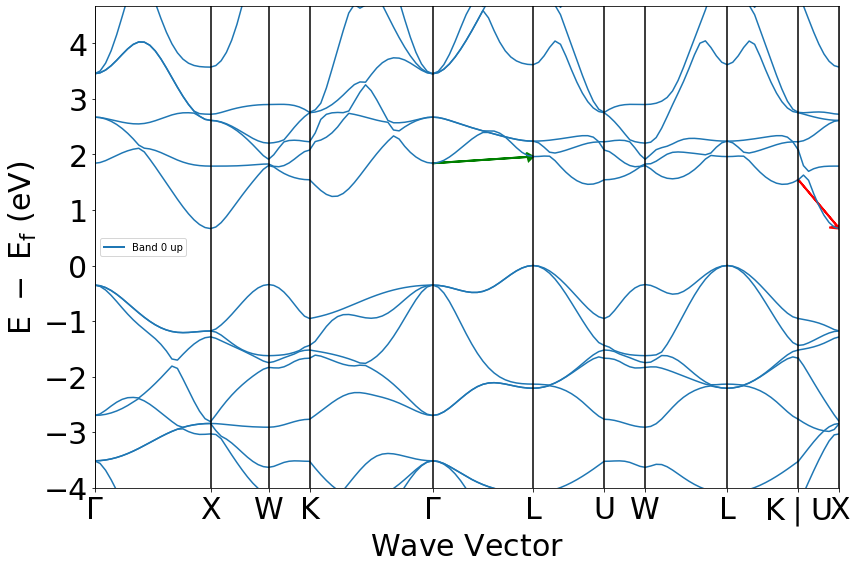

In [138]:
# Préparation du graphe
plsb = plotBand.get_plot()

# Indice de la première bande
cbm = bandStruct.get_cbm()
inC = cbm["band_index"][Spin.up][-1]

# Valeur de la première bande de conduction
lastBandC = np.zeros(len(dTtT))
for i in range(len(dTtT)) :
    lastBandC[i] = abs((energies[i][inC][-1]-energies[i][inC][0])/dTtT[i])

# Dispersion maximale
inMC = np.argmax(lastBandC)

# Dispersion minimale
inmC = np.argmin(lastBandC)

print(100*"=")
print("Pour la dernière bande de conduction :")
print(" - direction avec la plus grande dispersion = {0} -> {1} avec une valeur de {2:.5f}".format(labels[inMC],labels[inMC+1],lastBandVal[inMC]))
print(" - direction avec la plus petite dispersion = {0} -> {1} avec une valeur de {2:.5f}".format(labels[inmC],labels[inmC+1],lastBandVal[inmC]))
print(100*"=")

# Direction de la dispersion maximale
plt.arrow(dists[inMC],energies[inMC][inC][0],dTtT[inMC],energies[inMC][inC][-1]-energies[inMC][inC][0],
          head_width=0.15, head_length=0.05, linewidth=2, color='r', length_includes_head=True)

# Direction de la dispersion minimale
plt.arrow(dists[inmC],energies[inmC][inC][0],dTtT[inmC],energies[inmC][inC][-1]-energies[inmC][inC][0],
          head_width=0.15, head_length=0.05, linewidth=2, color='g', length_includes_head=True)

# Affichage du graphique
plt.show()

# TODO

---

## Calcul des masses effectives



---

### Sommet de la dernière bande de valence

[[ 1.          5.53221295 30.60538016]
 [ 1.          5.17354154 26.76553202]
 [ 1.          6.15345007 37.86494779]] [ 0.     -0.4658 -0.454 ]


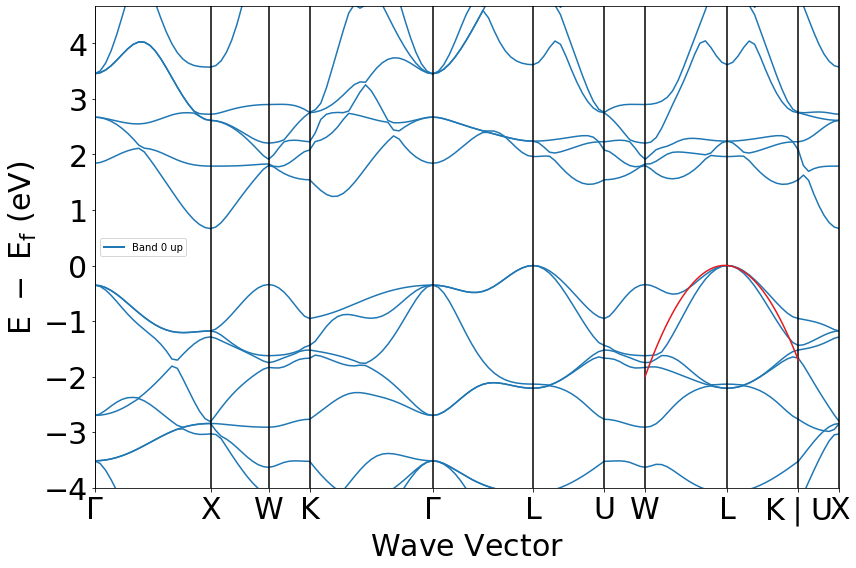

In [155]:
hb = 1.054571818*10**(-34)  # Constante de Planck réduite en [Js]
ev = 1.602176563*10**(-19)  # Valeur de 1 eV en [J]
A = 10**(-10)  # Valeur de 1 Angstrom en [m]

# Pour obtenir l'équation d'une parabole, il faut connaitre 3 points
maxPos = [dists[8],energies[8][inV][0]]  # Position du maximum
posDf1 = [dists[7]+dTtT[7]/2,energies[7][inV][7]]  # Position d'un point sur la courbe
posDf2 = [dists[8]+dTtT[8]/2,energies[8][inV][7]]  # Position d'un autre point sur la courbe

# On résoud le système décrit par
O = np.ones(3)
X = np.array([maxPos[0],posDf1[0],posDf2[0]])
Y = np.array([maxPos[1],posDf1[1],posDf2[1]])
print(Amat, Y)
Amat = np.array([O,X,X**2]).T
S = np.linalg.solve(Amat,Y)

x = np.linspace(dists[7],dists[9],100)
y = S[0]+S[1]*x+S[2]*x**2

plsb = plotBand.get_plot()
plt.plot(x,y)
plt.show()

[[1.         1.01447597 1.02916149]
 [1.         0.76085698 0.57890334]
 [1.         1.26809496 1.60806482]] [0.665  1.9138 1.3902]


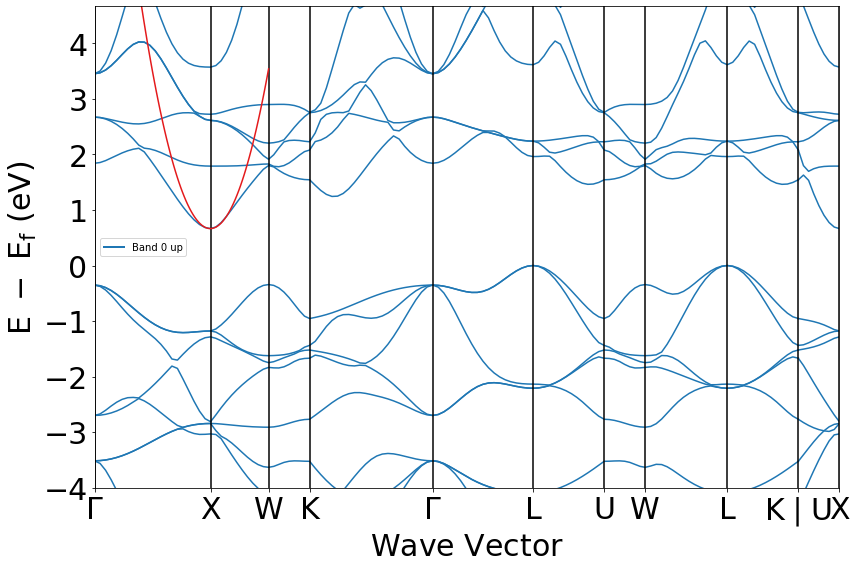

In [160]:
# Pour obtenir l'équation d'une parabole, il faut connaitre 3 points
minPos = [dists[1],energies[1][inC][0]]  # Position du maximum
posDf1 = [dists[0]+dTtT[0]*2/3,energies[0][inC][10]]  # Position d'un point sur la courbe
posDf2 = [dists[1]+dTtT[1]/2,energies[1][inC][7]]  # Position d'un autre point sur la courbe

# On résoud le système décrit par
O = np.ones(3)
X = np.array([minPos[0],posDf1[0],posDf2[0]])
Y = np.array([minPos[1],posDf1[1],posDf2[1]])
print(Amat, Y)
Amat = np.array([O,X,X**2]).T
S = np.linalg.solve(Amat,Y)

x = np.linspace(dists[0],dists[2],100)
y = S[0]+S[1]*x+S[2]*x**2

plsb = plotBand.get_plot()
plt.plot(x,y)
plt.show()